# Importance of the Project

The COVID-19 pandemic has caused significant disruption globally, and the situation continues to evolve. The analysis and prediction of COVID-19 spread are essential for effective public health policies and prevention strategies. This project aims to analyze COVID-19 data from various sources and develop models to predict the future spread of the virus.

<h5>Q.Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?
    

In the context of the COVID-19 pandemic, accurate disease prediction has been instrumental in guiding public health responses worldwide. Predictive models have helped in estimating infection rates, identifying high-risk areas, and guiding vaccination strategies, thereby enabling a more effective and targeted approach to pandemic management.

Overall, accurate disease prediction enhances our ability to proactively address health challenges, improve treatment outcomes, allocate resources efficiently, and inform public health decision-making. It is an invaluable tool in today's world, particularly in the face of emerging infectious diseases and other health threats.

<h4>Q.How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

Accurate disease prediction empowers the medical field to implement effective screening strategies, prioritize resources, provide personalized care, and reduce the healthcare burden.

By identifying individuals at higher risk and intervening early, we can shift the focus from reactive care to proactive prevention, resulting in improved patient outcomes and more efficient healthcare systems.

<h4>Q.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

This project can serve as a valuable foundation for future disease prediction endeavors. Here are some potential knowledge gaps and the potential helpfulness of this proposed method for future diseases:

<h6>Knowledge gaps:</h6>
    
a. Limited data availability: Depending on the stage of a disease outbreak or emergence, there may be limited data available for training and validating predictive models. This lack of data can pose challenges in developing accurate and reliable models.

b. Unique disease characteristics: Different diseases have distinct characteristics in terms of transmission, symptoms, and epidemiology. Therefore, this model, specifically designed for COVID-19, may not directly translate to other diseases without considering disease-specific factors and modifying the model accordingly.

c. Evolving nature of diseases: As mentioned earlier, diseases can evolve over time, requiring continuous updates and adaptations of predictive models to incorporate new information and patterns. Ongoing monitoring and model refinement are necessary to account for changes in disease dynamics.

<h6>Potential helpfulness:</h6>
    
a. Transferable techniques: The techniques and methodologies employed in this project, such as feature engineering, model selection, and evaluation metrics, can serve as a valuable reference for future disease prediction projects. The knowledge and experience gained from this project can be applied to develop prediction models for other diseases.

b. Data management and preprocessing: Handling and preprocessing large-scale health data, as i likely did in this project, can provide insights into the challenges and best practices for data management. These skills can be transferable to future disease prediction projects, streamlining the data preprocessing stage.

c. Model architecture and evaluation: The machine learning model i developed can serve as a starting point for future disease prediction projects. While it may require modifications and adjustments to suit the specific characteristics of other diseases, the architecture and evaluation methods can provide a solid foundation for building new models.

<h6>This project would have provided insights into the strengths and limitations of the predictive model for COVID-19. Documenting these lessons learned, including the challenges faced and the strategies employed to address them, can be valuable knowledge for future researchers and practitioners working on disease prediction.</h6>

# Dataset Description

Dataset contails symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature. Details of the columns are :

- ID (Individual ID)

- Sex (male/female).

- Age ≥60 above years (true/false)

- Test date (date when tested for COVID)

- Cough (true/false).

- Fever (true/false).

- Sore throat (true/false).

- Shortness of breath (true/false).

- Headache (true/false).

Known contact with an individual confirmed to have COVID-19 (true/false).
Corona positive or negative




# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [4]:
covid = pd.read_csv('corona_tested_006.csv')

In [5]:
covid.head()  #First 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
covid.sample(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
224326,224327,22-04-2020,False,False,False,False,False,negative,None,male,Other
90081,90082,03-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
124988,124989,09-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Abroad
119082,119083,08-04-2020,FALSE,FALSE,False,False,False,negative,No,male,Other
138143,138144,12-04-2020,False,False,False,False,False,negative,Yes,male,Other
174243,174244,17-04-2020,False,False,False,False,False,negative,None,female,Other
270549,270550,29-04-2020,False,False,False,False,False,negative,None,male,Other
241346,241347,24-04-2020,False,False,False,False,False,other,None,female,Other
194508,194509,19-04-2020,False,False,False,False,False,negative,None,female,Other
106259,106260,06-04-2020,FALSE,FALSE,False,False,False,positive,No,female,Contact with confirmed


# Data cleaning

Covid symptoms 'FALSE' or 'False'. In english meaning is same but python interprets as different.

In [8]:
#Defining a function to convert the data.
def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [9]:
#Using map function convert the value into same type.

covid['Cough_symptoms'] = covid['Cough_symptoms'].apply(convert)
covid['Fever'] = covid['Fever'].apply(convert)
covid['Sore_throat'] = covid['Sore_throat'].apply(convert)
covid['Shortness_of_breath'] = covid['Shortness_of_breath'].apply(convert)
covid['Headache'] = covid['Headache'].apply(convert)

In [10]:
covid.sample(10)  #checking the value after conversion

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
266536,266537,28-04-2020,false,false,false,false,false,negative,None,female,Other
60195,60196,30-03-2020,false,false,false,false,false,negative,No,male,Other
205505,205506,20-04-2020,false,false,false,false,false,negative,None,female,Other
277543,277544,30-04-2020,false,false,false,false,false,negative,None,female,Other
153169,153170,14-04-2020,true,false,false,false,false,negative,No,female,Other
88224,88225,03-04-2020,false,false,false,false,false,negative,No,male,Other
213208,213209,21-04-2020,false,false,false,false,false,negative,None,female,Other
158470,158471,15-04-2020,false,false,false,false,false,negative,None,male,Other
105645,105646,06-04-2020,false,false,false,false,false,negative,No,male,Other
32769,32770,26-03-2020,false,false,false,false,false,negative,No,female,Other


IN the Dataset 'None' and 'Other' should replace with 'Nan'

In [11]:
covid.replace({'None':np.nan},inplace= True)

In [12]:
# Finding the total null values

covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [13]:
# Finding the % of null values in each column

for i in covid.columns:
    print(f"{i} has ",round(covid[i].isnull().sum()*100/covid.shape[0],5),"%")

Ind_ID has  0.0 %
Test_date has  0.0 %
Cough_symptoms has  0.09037 %
Fever has  0.09037 %
Sore_throat has  0.00036 %
Shortness_of_breath has  0.00036 %
Headache has  0.00036 %
Corona has  0.0 %
Age_60_above has  45.65928 %
Sex has  7.01565 %
Known_contact has  0.0 %


In [14]:
covid.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [15]:
#Droping nan rows having columns less than 1% nan

covid.dropna(subset=['Cough_symptoms','Fever','Shortness_of_breath','Sore_throat','Headache'],axis=0,inplace=True)

In [16]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed


In [17]:
#Again checking null value
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127315
Sex                     19552
Known_contact               0
dtype: int64

In [18]:
#Copy cleaned dataset for other uses
new_covid = covid.copy()
new_covid.to_csv('new_covid.csv',index=False)

In [19]:
new_covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,NaN,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,NaN,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,NaN,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,NaN,male,Other


In [20]:
#Drop Age_60_avobe column which is more than 40% data null.

covid.drop('Age_60_above',axis=1,inplace=True)

# Changing Datatype 
The '*object*' data type is a general-purpose data type that can represent various types of data, while the '*category*' data type is specifically designed for columns with a limited number of unique values, providing memory and performance optimizations for categorical data.

In [21]:
#converting datatype as categorical

for i in covid.columns:
    if i == 'Ind_ID' or i == 'Test_date':
        pass
    else:
        covid[i] = covid[i].astype('category')

In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               278594 non-null  int64   
 1   Test_date            278594 non-null  object  
 2   Cough_symptoms       278594 non-null  category
 3   Fever                278594 non-null  category
 4   Sore_throat          278594 non-null  category
 5   Shortness_of_breath  278594 non-null  category
 6   Headache             278594 non-null  category
 7   Corona               278594 non-null  category
 8   Sex                  259042 non-null  category
 9   Known_contact        278594 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.5+ MB


In [23]:
#checking what are the value and howmuch value presents in target column.
covid['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

In [24]:
#Replace 'other' with null value.

covid['Corona'] = covid['Corona'].replace('other', np.nan)

In [25]:
covid.dropna(subset=['Corona'],axis=0,inplace=True)

In [26]:
covid['Corona'].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

In [27]:
covid.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

# EDA

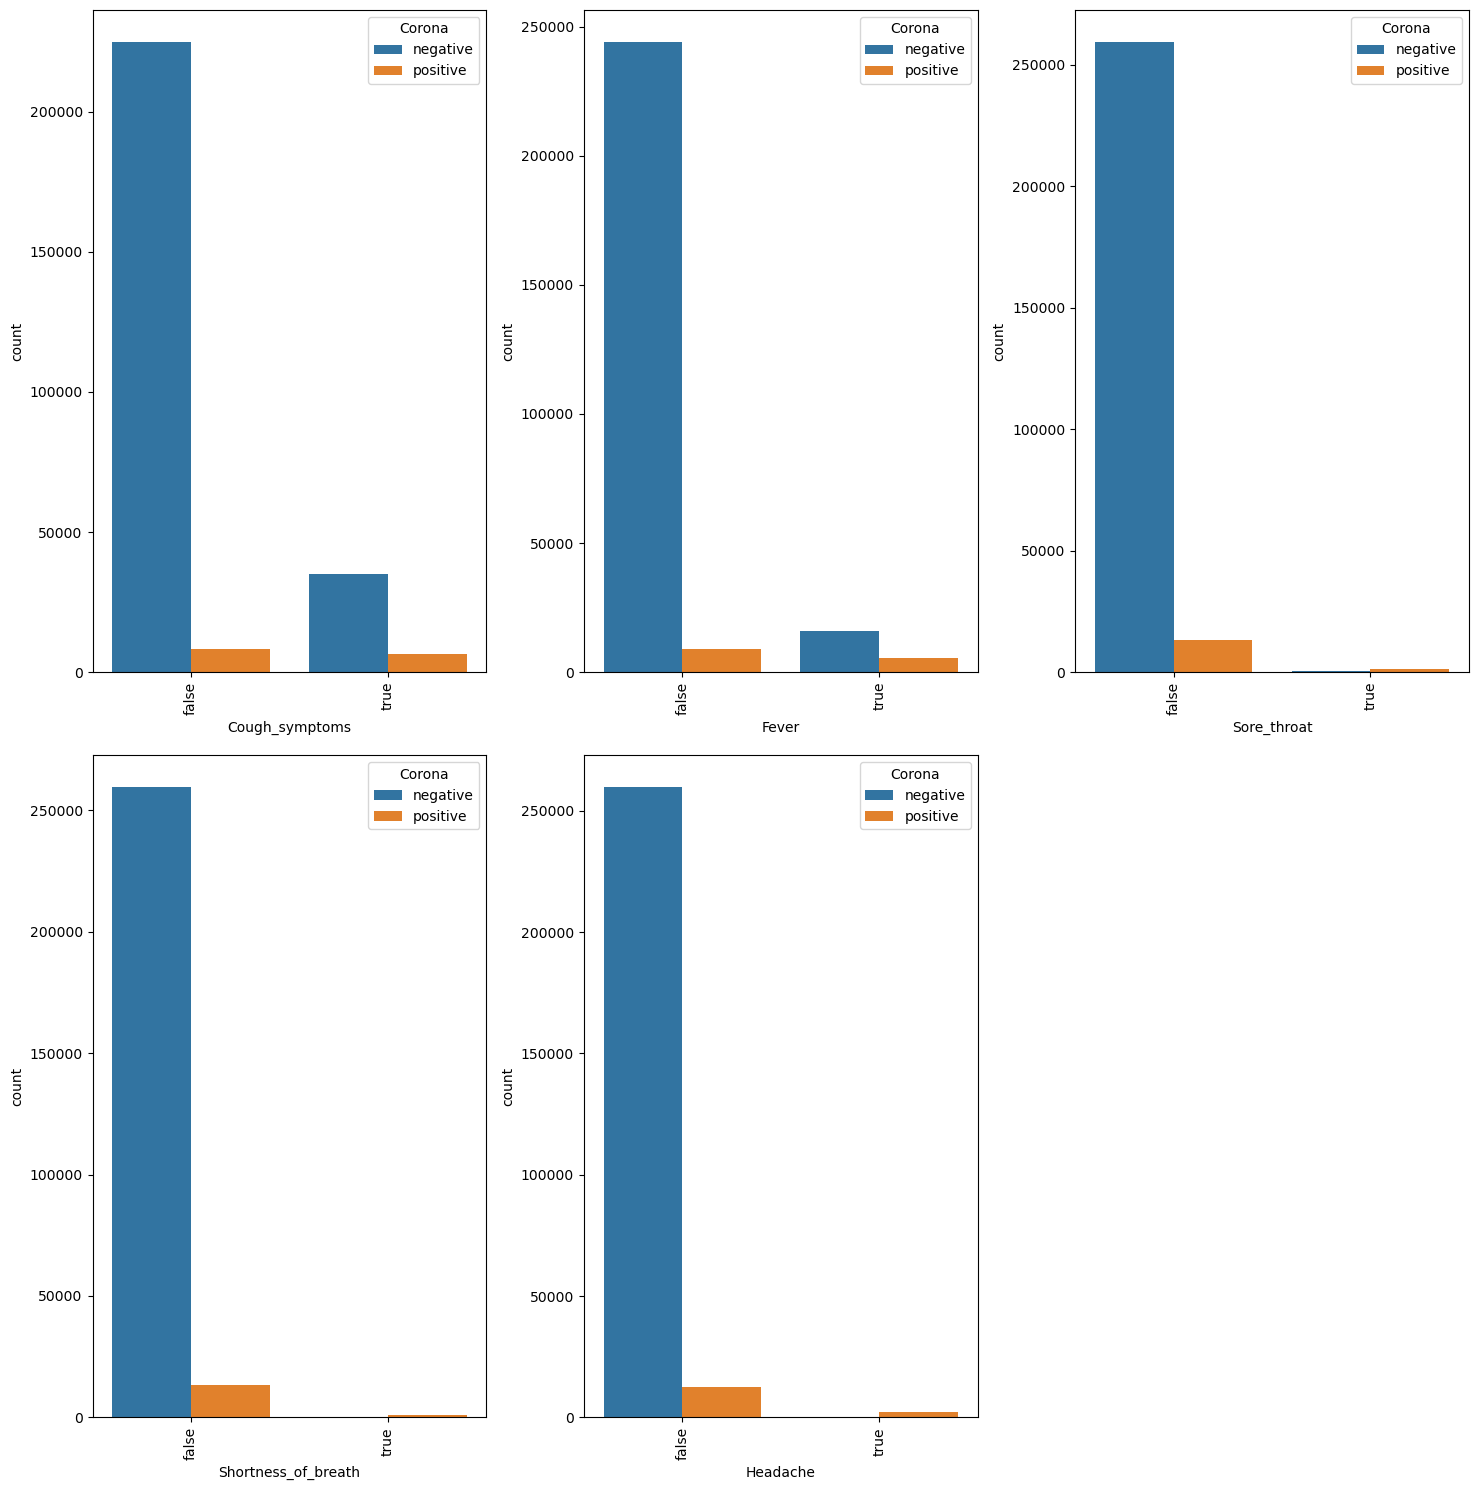

In [28]:
#univatiate analysis

# list of categorical variables to plot
cat_vars = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Corona', data=covid, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

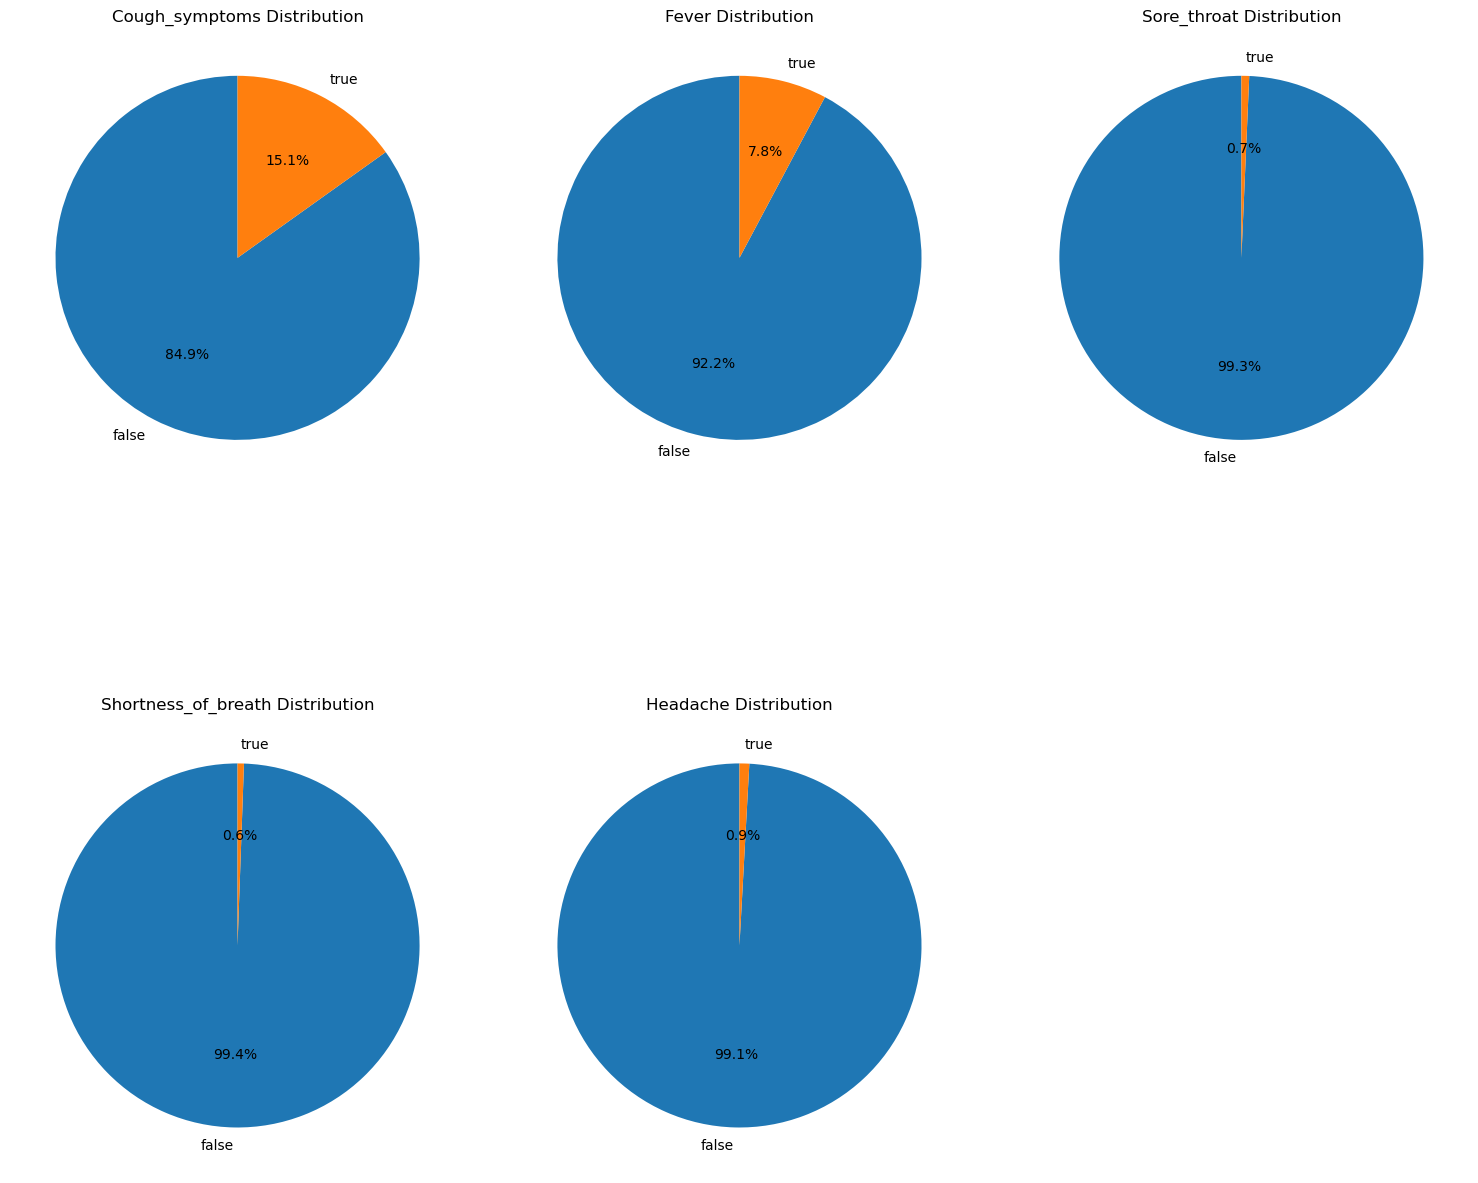

In [29]:
cat_vars = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = covid[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])
# show the plot
plt.show()

In [30]:
#copy the dataset for Encoding and Model implementation

covid_data = covid.copy(deep = True)

# Encoding

The `get_dummies()` method in pandas is used to convert categorical variables into dummy or indicator variables.
It creates a new DataFrame with binary columns representing the different categories in the original variable. 
Each category becomes a new column, and the values in those columns are 1 or 0, indicating the presence or absence of the category in each observation.

In [31]:
covid_data['Cough_symptoms'] = pd.get_dummies(covid_data['Cough_symptoms'],drop_first=True)
covid_data['Fever']= pd.get_dummies(covid_data['Fever'],drop_first=True)
covid_data['Shortness_of_breath']= pd.get_dummies(covid_data['Shortness_of_breath'],drop_first=True)
covid_data['Sore_throat']=pd.get_dummies(covid_data['Sore_throat'],drop_first=True)
covid_data['Headache']= pd.get_dummies(covid_data['Headache'],drop_first=True)
covid_data['Corona']= pd.get_dummies(covid_data['Corona'],drop_first=True)

In [32]:
covid_data['Sex'].replace({'male':0,'female':1},inplace=True)
covid_data['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [33]:
#Display dataset after encoding categorical value to numerical value
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,NaN,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,1


In [34]:
#Checking null value
covid_data.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

# Imputation

As Gender column has some missing data,So we have to fiil the data by using some imputation method.
First we have to check the data how it is distrubuted accordingly we will use suitable imputation method.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

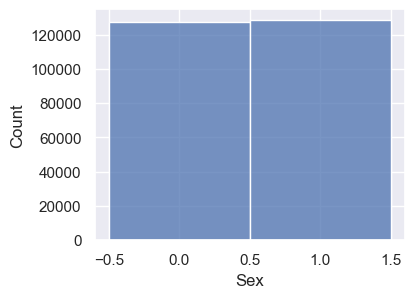

In [35]:
#Distribution of sex column

sns.set(rc={'figure.figsize': (4, 3)})  # the set() function from the seaborn library to modify the runtime configuration (rc) parameters.

sns.histplot(covid_data['Sex'])


From the above fig. we conclude that data is uniformly distributed so better to use KNN imputation.

In [36]:
# Applying KNN imputation

#import the library
from sklearn.impute import KNNImputer

#create an instance of the KNNImputer
knn=KNNImputer(n_neighbors=5,weights='uniform')

imputed = knn.fit_transform(covid_data[['Sex']])


In [37]:
#Assign the imputed values back to the DataFrame

covid_data['Sex'] = imputed

In [38]:
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0.502265,0
1,2,11-03-2020,0,1,0,0,0,1,0.502265,0
2,3,11-03-2020,0,1,0,0,0,1,0.502265,0
3,4,11-03-2020,1,0,0,0,0,0,0.502265,0
4,5,11-03-2020,1,0,0,0,0,0,0.502265,1


In [39]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [40]:
covid_data['Sex'] = covid_data['Sex'].apply(change)

In [41]:
covid_data.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
265254,265255,28-04-2020,0,0,0,0,0,0,1,2
164513,164514,16-04-2020,0,0,0,0,0,0,0,2
219401,219402,22-04-2020,0,0,0,0,0,0,0,2
20145,20146,23-03-2020,0,0,0,0,0,0,0,2
265738,265739,28-04-2020,0,0,0,0,0,0,0,2


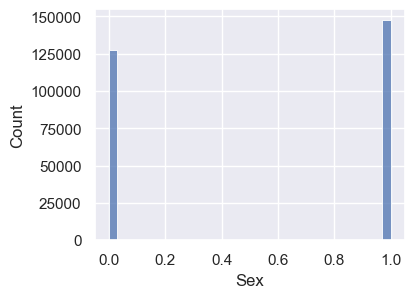

In [42]:
sns.histplot(covid_data['Sex'])
plt.show()

In [43]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  uint8   
 3   Fever                274702 non-null  uint8   
 4   Sore_throat          274702 non-null  uint8   
 5   Shortness_of_breath  274702 non-null  uint8   
 6   Headache             274702 non-null  uint8   
 7   Corona               274702 non-null  uint8   
 8   Sex                  274702 non-null  int64   
 9   Known_contact        274702 non-null  category
dtypes: category(1), int64(2), object(1), uint8(6)
memory usage: 10.2+ MB


In [44]:
#Changeing All datatype into category type.

final_data= covid_data.astype('category')

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 15.7 MB


In [46]:
final_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,1,0
1,2,11-03-2020,0,1,0,0,0,1,1,0
2,3,11-03-2020,0,1,0,0,0,1,1,0
3,4,11-03-2020,1,0,0,0,0,0,1,0
4,5,11-03-2020,1,0,0,0,0,0,1,1


# Feature Engineering

In [47]:
# Separating Feature and Target

X = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)
Y = final_data['Corona']

In [48]:
# Splitting Train_Test Set

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [49]:
# Size of test data

Y_train.value_counts()

0    181954
1     10337
Name: Corona, dtype: int64

In [50]:
Y_test.value_counts()

0    78054
1     4357
Name: Corona, dtype: int64

# Model Selection

<h3>1. RandomForest Classifier

In [51]:
#Loading RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
# Prediction on dataset
rf_pred=rf.predict(X_test)

In [53]:
# Accuracy Score
rf_accuracy=accuracy_score(Y_test,rf_pred)
print("Accuracy: ",rf_accuracy*100)

Accuracy:  96.80746502287316


<h4> *Performance measure for RandomForest

CONFUSION MATRIX: 
A confusion matrix, also known as an error matrix, is a table that summarizes the performance of a classification model on a set of test data. It is commonly used in machine learning to evaluate the accuracy of a classification algorithm.


Confusion_Matrix:
 [[77421   633]
 [ 1998  2359]]
Precision:  99.18902298408794
Recall:  97.48422921467156
F1-score:  98.32923739307692
False Negative Score :  2.515770785328448


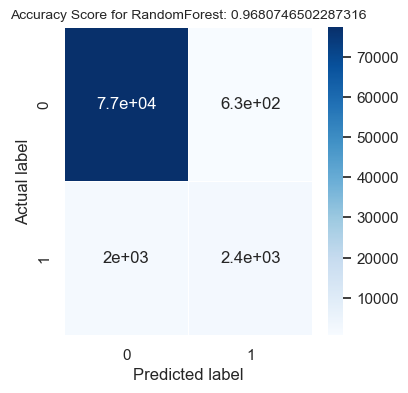

In [54]:
# Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_pred)
print("Confusion_Matrix:\n",rf_cm)

#Plot Heatmap for Comfusion Mtrix
plt.figure(figsize=(4,4))
sns.heatmap(data=rf_cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for RandomForest: {0}'.format(rf.score(X_test, Y_test))
plt.title(all_sample_title, size = 10)


#precision
rf_prec=rf_cm[0][0]*100/(rf_cm[0][0]+rf_cm[0][1])
print("Precision: ",rf_prec)

#recall
rf_rec=rf_cm[0][0]*100/(rf_cm[0][0]+rf_cm[1][0])
print("Recall: ",rf_rec)

#F1-score
rf_f1=2*rf_prec*rf_rec/(rf_prec+rf_rec)
print("F1-score: ",rf_f1)

#False negative score
rf_fns=rf_cm[1][0]*100/(rf_cm[0][0]+rf_cm[1][0])
print("False Negative Score : ",rf_fns)


<h3>2. Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
#prediction on dataset
dt_pred=dt.predict(X_test)

dt_accuracy = accuracy_score(Y_test,dt_pred)
print("Accuracy :",dt_accuracy*100)

Accuracy : 96.80746502287316


<h4> *Performance Measure for DecisionTree Classifier

In [57]:
#Confusion Matrix
dt_cm=confusion_matrix(Y_test,dt_pred)
print("Confusion_Matrix: \n",dt_cm)

#precision
dt_prec=dt_cm[0][0]*100/(dt_cm[0][0]+dt_cm[0][1])
print("Precision: ",dt_prec)

#recall
dt_rec=dt_cm[0][0]*100/(dt_cm[0][0]+dt_cm[1][0])
print("Recall: ",dt_rec)

#F1-score
dt_f1=2*dt_prec*dt_rec/(dt_prec+dt_rec)
print("F1-score: ",dt_f1)

#False Negative Score
dt_fns=rf_cm[1][0]*100/(dt_cm[0][0]+dt_cm[1][0])
print("False Negative Score : ",dt_fns)

Confusion_Matrix: 
 [[77421   633]
 [ 1998  2359]]
Precision:  99.18902298408794
Recall:  97.48422921467156
F1-score:  98.32923739307692
False Negative Score :  2.515770785328448


<h3>3. Support Vector Machine

In [58]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [59]:
#prediction on dataset
svc_pred = svc.predict(X_test)

svc_accuracy=accuracy_score(Y_test,svc_pred)
print("Accuracy :",svc_accuracy*100)

Accuracy : 96.80746502287316


<h4>*Performance Measure for Support Vector MachineClassifier

In [60]:
#Confusion Matrix
svc_cm=confusion_matrix(Y_test,svc_pred)
print("Confusion_Matrix: \n",dt_cm)

#precision
svc_prec=svc_cm[0][0]*100/(svc_cm[0][0]+svc_cm[0][1])
print("Precision: ",svc_prec)

#recall
svc_rec=svc_cm[0][0]*100/(svc_cm[0][0]+svc_cm[1][0])
print("Recall: ",svc_rec)

#F1-score
svc_f1=2*svc_prec*svc_rec/(svc_prec+svc_rec)
print("F1-score: ",svc_f1)

#False Negative Score
svc_fns=svc_cm[1][0]*100/(svc_cm[0][0]+svc_cm[1][0])
print("False Negative Score : ",svc_fns)

Confusion_Matrix: 
 [[77421   633]
 [ 1998  2359]]
Precision:  99.17493017654445
Recall:  97.49738655112914
F1-score:  98.32900394408419
False Negative Score :  2.5026134488708642


<h3>4. Naive Bayes Classifier

In [61]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [62]:
#prediction on dataset
nb_pred = nb.predict(X_test)

nb_accuracy=accuracy_score(Y_test,nb_pred)
print("Accuracy :",nb_accuracy*100)

Accuracy : 93.78845057091894


<h4>*Performance Measure for Naive Bayes Classifier

In [63]:
#Confusion Matrix
nb_cm=confusion_matrix(Y_test,nb_pred)
print("Confusion_Matrix: \n",nb_cm)

#precision
nb_prec=nb_cm[0][0]*100/(nb_cm[0][0]+nb_cm[0][1])
print("Precision: ",nb_prec)

#recall
nb_rec=nb_cm[0][0]*100/(nb_cm[0][0]+nb_cm[1][0])
print("Recall: ",nb_rec)

#F1-score
nb_f1=2*nb_prec*nb_rec/(nb_prec+nb_rec)
print("F1-score: ",nb_f1)

#False Negative Score
nb_fns=nb_cm[1][0]*100/(nb_cm[0][0]+nb_cm[1][0])
print("False Negative Score : ",nb_fns)

Confusion_Matrix: 
 [[76069  1985]
 [ 3134  1223]]
Precision:  97.45688882056012
Recall:  96.04307917629383
F1-score:  96.74481899056957
False Negative Score :  3.956920823706173


# Compare performance Visually

AREA UNDER THE CURVE: 
The AUC-ROC curve, also known as the Receiver Operating Characteristic curve, is a graphical representation of the performance of a binary classification model. It illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) for different classification thresholds.

The AUC value ranges from 0 to 1, where a higher value indicates better performance. An AUC of 0.5 implies random guessing, while an AUC of 1 signifies a perfect classifier.

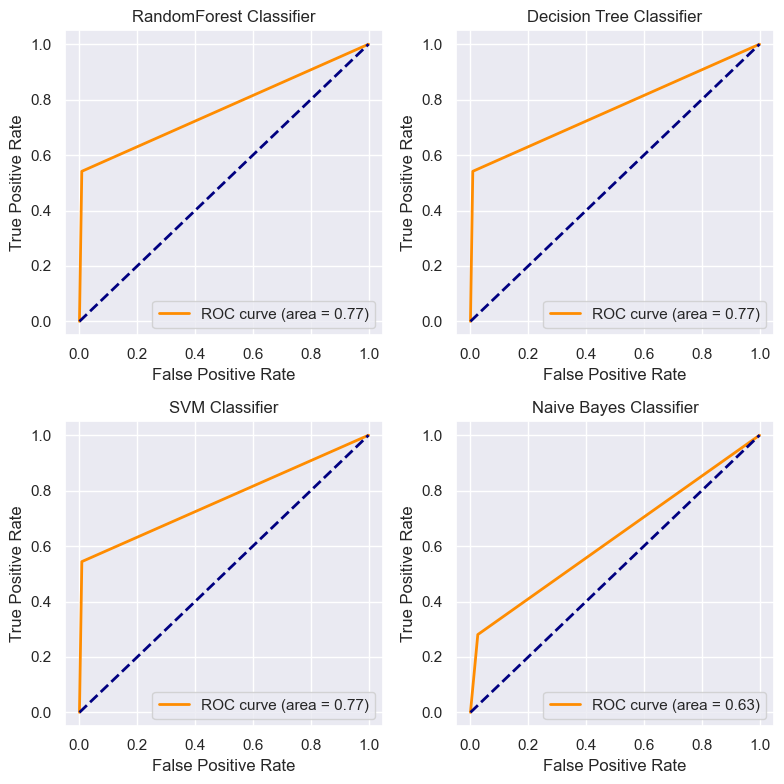

In [64]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# AUC-ROC curve for RandomForest Classifier
fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
roc_auc = auc(fpr, tpr)
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('RandomForest Classifier')
axs[0, 0].legend(loc="lower right")

# AUC-ROC curve for Decision Tree Classifier
fpr, tpr, thresholds = roc_curve(Y_test, dt_pred)
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Decision Tree Classifier')
axs[0, 1].legend(loc="lower right")

# AUC-ROC curve for SVM Classifier
fpr, tpr, thresholds = roc_curve(Y_test, svc_pred)
roc_auc = auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('SVM Classifier')
axs[1, 0].legend(loc="lower right")

# AUC-ROC curve for Naive Bayes Classifier
fpr, tpr, thresholds = roc_curve(Y_test, nb_pred)
roc_auc = auc(fpr, tpr)
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('Naive Bayes Classifier')
axs[1, 1].legend(loc="lower right")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


# Conlusion

Overall, the Random Forest classifier emerges as the recommended model for coronavirus prediction in this project, demonstrating its potential to contribute significantly to public health initiatives and decision-making processes in combating the spread of the virus.